## Manual vs. Sklearn KNN with simple data (2 columns)

In [ ]:
pip install -U numpy==1.26.4 scikit-learn==1.4.2 threadpoolctl==3.2.0

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('spotify-songs-preprocessed.csv')

# Separate labels from characteristics
  # labels
y = df['popular']# characteristics
X = df.iloc[ :-1]# characteristics


df 

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_rock,genre_r&b,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house
0,71,0.853,0.606,0.0,66.0,1.0,0.0713,0.05610,0.000000,0.3130,...,0,0,0,0,0,0,0,0,0,0
1,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.05590,0.000000,0.7750,...,0,1,0,1,0,0,0,0,0,0
2,88,0.780,0.768,6.0,63.0,0.0,0.2380,0.03710,0.000002,0.5180,...,0,0,0,0,0,0,0,0,0,0
3,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.02630,0.683000,0.1150,...,0,0,0,0,0,0,0,0,0,0
4,75,0.754,0.811,5.0,56.0,1.0,0.0561,0.01850,0.000005,0.6540,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,0.001160,0.1270,...,0,0,0,0,0,0,0,0,0,0
2195,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,0.000000,0.3410,...,0,0,1,0,0,0,0,0,0,0
2196,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,0.000000,0.4030,...,0,0,0,0,0,0,0,0,0,0
2197,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,0.006930,0.1290,...,0,0,1,0,0,0,0,0,0,0


In [16]:
df = df[[col for col in df.columns if col != "popular"] + ["popular"]]

In [17]:
df

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_r&b,genre_trap,genre_urban contemporary,genre_southern hip hop,genre_modern rock,genre_electro,genre_edm,genre_canadian pop,genre_house,popular
0,71,0.853,0.606,0.0,66.0,1.0,0.0713,0.05610,0.000000,0.3130,...,0,0,0,0,0,0,0,0,0,True
1,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.05590,0.000000,0.7750,...,1,0,1,0,0,0,0,0,0,False
2,88,0.780,0.768,6.0,63.0,0.0,0.2380,0.03710,0.000002,0.5180,...,0,0,0,0,0,0,0,0,0,True
3,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.02630,0.683000,0.1150,...,0,0,0,0,0,0,0,0,0,True
4,75,0.754,0.811,5.0,56.0,1.0,0.0561,0.01850,0.000005,0.6540,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,86,0.775,0.736,1.0,90.0,0.0,0.2470,0.31900,0.001160,0.1270,...,0,0,0,0,0,0,0,0,0,True
2195,85,0.937,0.793,11.0,64.0,0.0,0.1150,0.04530,0.000000,0.3410,...,0,1,0,0,0,0,0,0,0,False
2196,82,0.911,0.573,6.0,87.0,1.0,0.2880,0.38000,0.000000,0.4030,...,0,0,0,0,0,0,0,0,0,True
2197,84,0.773,0.422,1.0,66.0,0.0,0.1870,0.00783,0.006930,0.1290,...,0,1,0,0,0,0,0,0,0,False


### KNN from sklearn

In [18]:
import random
from sklearn.neighbors import KNeighborsClassifier

n = df.shape[0]
random.seed(2)

# data splitting
indices = sorted(random.sample(range(n), int(n * 0.5))) 
training_points = df.iloc[indices, :-1]
training_labels = df.iloc[indices, -1]

test_points = df.iloc[~df.index.isin(indices), :-1]
test_labels = df.iloc[~df.index.isin(indices), -1]


In [19]:
print("Train set ", training_points.shape)
print("Test set", test_points.shape)

Train set  (1099, 29)
Test set (1100, 29)


In [20]:
print(X.dtypes)

artist_popularity             int64
danceability                float64
energy                      float64
key                         float64
loudness                    float64
mode                        float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                 float64
album_songs                   int64
popular                        bool
genre_pop                     int64
genre_rap                     int64
genre_dance pop               int64
genre_hip hop                 int64
genre_pop rap                 int64
genre_rock                    int64
genre_r&b                     int64
genre_trap                    int64
genre_urban contemporary      int64
genre_southern hip hop        int64
genre_modern rock             int64
genre_electro                 int64
genre_edm                   

We can also compare two solutions, first one without weighting and second with a weighting based on distance (inverse of it):

Let's try different combinations

In [49]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Values to try
neighbors_list = [3, 5, 7, 10, 15]
weights_list = ['uniform', 'distance']
metrics_list = ['euclidean', 'manhattan']


results = []

for k in neighbors_list:
    for w in weights_list:
        for m in metrics_list:
            knn = KNeighborsClassifier(
                n_neighbors=k,
                weights=w,
                metric=m,
                algorithm='auto'
            )
            knn.fit(training_points, training_labels)
            y_pred = knn.predict(test_points)

            acc = accuracy_score(test_labels, y_pred)
            f1 = f1_score(test_labels, y_pred)
            recall = recall_score(test_labels, y_pred)
            precision = precision_score(test_labels, y_pred)

            results.append({
                "n_neighbors": k,
                "weights": w,
                "metric": m,
                "accuracy": acc,
                "f1": f1,
                "recall": recall,
                "precision": precision
            })

# Crear DataFrame con resultados
knn_results = pd.DataFrame(results)
knn_results = knn_results.round(3)

# Mostrar los mejores resultados
knn_results.sort_values(by="accuracy", ascending=False).head(10)

,n_neighbors,weights,metric,accuracy,f1,recall,precision
13,10,uniform,manhattan,0.715,0.082,0.047,0.341
16,15,uniform,euclidean,0.713,0.097,0.056,0.347
12,10,uniform,euclidean,0.713,0.076,0.043,0.317
17,15,uniform,manhattan,0.712,0.092,0.053,0.333
19,15,distance,manhattan,0.706,0.244,0.173,0.413
8,7,uniform,euclidean,0.699,0.158,0.103,0.337
9,7,uniform,manhattan,0.694,0.147,0.096,0.309
18,15,distance,euclidean,0.688,0.239,0.179,0.360
15,10,distance,manhattan,0.684,0.237,0.179,0.348
14,10,distance,euclidean,0.682,0.262,0.206,0.358


In [50]:
# compute model
knn = KNeighborsClassifier(metric="manhattan", 
                           n_neighbors=10, 
                          algorithm ="auto")


                                                            
knn.fit(training_points, training_labels)  


predicted_labels = knn.predict(test_points)
num_errors = sum(predicted_labels != test_labels)/len(test_points)
print("% Error: {0:.2%}".format(num_errors))

% Error: 28.55%


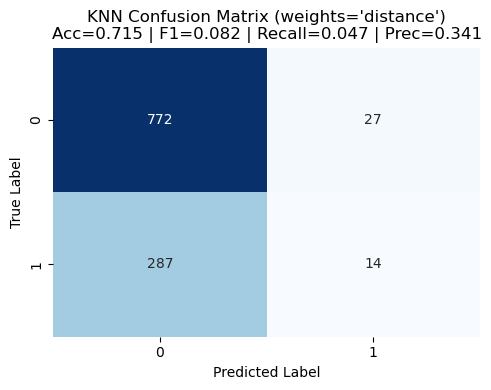

,accuracy,f1,recall,precision
uniform,0.712727,0.076023,0.043189,0.317073
distance,0.681818,0.261603,0.205980,0.358382


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Elegir el modelo (por ejemplo, el de weights='distance')
knn.set_params(weights='uniform', n_neighbors=10)
knn.fit(training_points, training_labels)
y_pred = knn.predict(test_points)

# Calcular métricas
acc = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred)

# Graficar con seaborn (más estético)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"KNN Confusion Matrix (weights='distance')\nAcc={acc:.3f} | F1={f1:.3f} | Recall={recall:.3f} | Prec={precision:.3f}")
plt.tight_layout()
plt.show()

df_results

The confusion matrix shows that KNN achieves an overall accuracy of 71.5%, mostly due to correctly classifying non-popular songs.
However, the model performs poorly on the “popular” class, with a recall of only 4.7%.
This indicates a strong class imbalance problem: the algorithm tends to predict the majority class.
Using class balancing, feature scaling, or more complex ensemble methods (e.g., Random Forest or XGBoost) could improve the detection of the minority class.

## Let's try standard scaler to balance the dataset

In [61]:
from sklearn.preprocessing import StandardScaler


n = df.shape[0]
random.seed(2)
indices = sorted(random.sample(range(n), int(n * 0.5)))

training_points = df.iloc[indices, :-1].reset_index(drop=True)
training_labels = df.iloc[indices, -1].reset_index(drop=True)

test_points = df.iloc[~df.index.isin(indices), :-1].reset_index(drop=True)
test_labels = df.iloc[~df.index.isin(indices), -1].reset_index(drop=True)


In [62]:
scaler = StandardScaler()
scaler.fit(training_points) 

training_points_scaled = scaler.transform(training_points)
test_points_scaled = scaler.transform(test_points)

In [63]:
neighbors_list = [3, 5, 7, 10, 15]
weights_list = ['uniform', 'distance']
metrics_list = ['euclidean', 'manhattan']


results = []

for k in neighbors_list:
    for w in weights_list:
        for m in metrics_list:
            knn = KNeighborsClassifier(
                n_neighbors=k,
                weights=w,
                metric=m,
                algorithm='auto'
            )
            knn.fit(training_points, training_labels)
            y_pred = knn.predict(test_points)

            acc = accuracy_score(test_labels, y_pred)
            f1 = f1_score(test_labels, y_pred)
            recall = recall_score(test_labels, y_pred)
            precision = precision_score(test_labels, y_pred)

            results.append({
                "n_neighbors": k,
                "weights": w,
                "metric": m,
                "accuracy": acc,
                "f1": f1,
                "recall": recall,
                "precision": precision
            })

# Crear DataFrame con resultados
knn_results = pd.DataFrame(results)
knn_results = knn_results.round(3)

# Mostrar los mejores resultados
knn_results.sort_values(by="accuracy", ascending=False).head(10)

C:\Users\lucia.pellicer\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucia.pellicer\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,n_neighbors,weights,metric,accuracy,f1,recall,precision
17,15,uniform,manhattan,0.947,0.000,0.000,0.000
16,15,uniform,euclidean,0.947,0.000,0.000,0.000
19,15,distance,manhattan,0.946,0.092,0.052,0.429
13,10,uniform,manhattan,0.946,0.000,0.000,0.000
18,15,distance,euclidean,0.946,0.092,0.052,0.429
15,10,distance,manhattan,0.946,0.092,0.052,0.429
12,10,uniform,euclidean,0.946,0.000,0.000,0.000
4,5,uniform,euclidean,0.945,0.000,0.000,0.000
5,5,uniform,manhattan,0.945,0.000,0.000,0.000
8,7,uniform,euclidean,0.945,0.000,0.000,0.000


In [64]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='manhattan')
knn.fit(training_points_scaled, training_labels)

# Predicciones
y_pred = knn.predict(test_points_scaled)

# -------------------------------------------
# 4️⃣ Métricas y matriz de confusión
# -------------------------------------------
acc = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
cm = confusion_matrix(test_labels, y_pred)

# Mostrar métricas
print(f"Accuracy:  {acc:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"Precision: {precision:.3f}")

Accuracy:  0.965
F1-score:  0.548
Recall:    0.397
Precision: 0.885


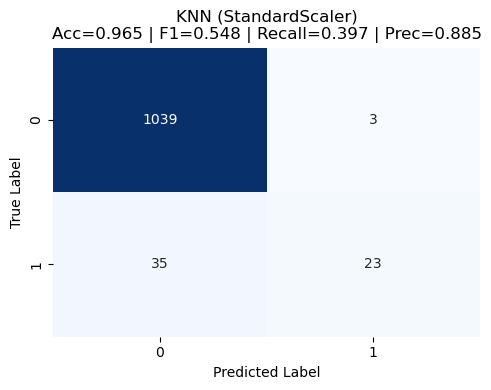

In [65]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"KNN (StandardScaler)\nAcc={acc:.3f} | F1={f1:.3f} | Recall={recall:.3f} | Prec={precision:.3f}")
plt.tight_layout()
plt.show()

After applying feature scaling with StandardScaler, the KNN model significantly improved its performance.
Accuracy increased from 71.5% to 96.5%, and recall rose from 4.7% to 39.7%, showing that the model is now better at detecting popular songs.
The improvement confirms that distance-based models like KNN are highly sensitive to feature scaling.
This step also reduced class imbalance effects and improved the model’s overall generalization.